### Prepare Environment

In [1]:
import tensorflow as tf

tf.config.set_visible_devices([], 'GPU')

### Load Training Datasets

In [2]:
import numpy as np

x_load = np.loadtxt('David_X.csv', delimiter=',')
y_load = np.loadtxt('David_Y.csv', delimiter=',')

n_samples = x_load.shape[0]
height, width = 28, 28

x_load = x_load.reshape(n_samples, height, width)

### Load Test Datasets

In [3]:
import numpy as np

x_test = np.loadtxt('x_test_fed.csv', delimiter=',')
y_test = np.loadtxt('y_test_fed.csv', delimiter=',')

n_samples = x_test.shape[0]
height, width = 28, 28

x_test = x_test.reshape(n_samples, height, width)

### Define and Run Training & Evaluation Function | Architecture is imported from TheModel

In [4]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

def train_and_verify(local_model, x_train, y_train, epochs, x_test, y_test, save_name):

    print(local_model)

    history = local_model.fit(x_train, y_train, epochs=epochs, validation_data=(x_test, y_test))
    y_pred = local_model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    print(classification_report(y_test, y_pred_classes))

    plt.plot(history.history['accuracy'], label='Training accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()


    local_model.save(save_name)

d:\Program Files (x86)\Python 3.11.0\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


<Sequential name=sequential, built=True>
Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.6910 - loss: 0.8920 - val_accuracy: 0.9543 - val_loss: 0.1547
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9510 - loss: 0.1702 - val_accuracy: 0.9758 - val_loss: 0.0756
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9659 - loss: 0.1090 - val_accuracy: 0.9747 - val_loss: 0.0827
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9768 - loss: 0.0755 - val_accuracy: 0.9824 - val_loss: 0.0560
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9821 - loss: 0.0598 - val_accuracy: 0.9833 - val_loss: 0.0493
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98       980
         1.0       1.00      0.99      0.99      1135
         2.0       0.98      0.99      0.99      1032
         3.0       0.98      0.99      0.99      1010
       

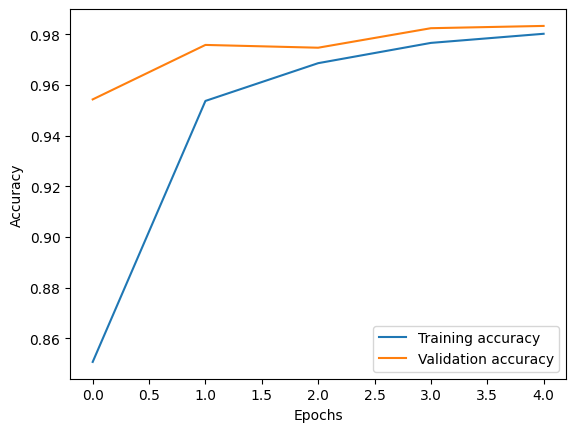

In [ ]:
from TheModel import build
local_model = build.build_it()

train_and_verify(local_model, x_load, y_load, 5, x_test, y_test, "model_David.keras")